In [1]:
from multissl.models import FeaturePCA
from multissl.data.mask_loader import SegmentationDataset
from torchvision import transforms
from torch.utils.data import DataLoader
import os
from multissl.plotting.false_color import visualize_features_from_model

In [2]:
CONFIG = {
    # Dataset parameters
    "img_dir": "../dataset/vineseg/imgs",  # Update with your path
    "mask_dir": "../dataset/vineseg/masks",  # Update with your path
    "unlabeled_dir": ["../dataset/vineseg/imgs/train_qbaixo5","../dataset/vineseg/imgs/train_valdoeiro5",  ],  # Optional path or list of paths to unlabeled images
    "img_size": 224,
    "batch_size": 4,
    "num_workers": 0,
    
    # Model parameters
    "pretrained_checkpoint": "../checkpoints_swin/last.ckpt",
    "backbone_type": "swin-tiny",  # Options: resnet18, resnet50, vit-s, swin-tiny
    "num_classes": 2,
    "in_channels": 4,  # 4 channels for R+G+RE+NIR
    "hidden_dim": 256,
    
    # Training parameters
    "epochs": 300,
    "lr": 3e-4,
    "weight_decay": 1e-4,
    "consistency_weight": 1.0,
    "consistency_rampup": 10,  # Epochs for ramping up consistency weight
    "check_val_every_n_epoch": 5,  # Validate every N epochs
    
    # Domain adaptation parameters
    "unfreeze_backbone_after": None,  # Unfreeze backbone after this many epochs (None to keep frozen)
    
    # Misc
    "seed": 42,
    "class_names": ["Background", "Vines"],  # Update with your class names
    "checkpoint_dir": "domain_adaptive_checkpoints",
    "project_name": "1SHOT_Segmentation",
    "class_names": ["Background","Vines"],  # Update with your class names
    "class_weights": [1.0,1.0],

}

In [3]:
test_dataset_v = SegmentationDataset(
    img_dir=os.path.join(CONFIG["img_dir"], "test_valdoeiro"),
    mask_dir=os.path.join(CONFIG["mask_dir"], "test_valdoeiro"),
    img_size=CONFIG["img_size"]
)

test_loader_v = DataLoader(
    test_dataset_v,
    batch_size=CONFIG["batch_size"],
    shuffle=False,
    num_workers=0,
    pin_memory=True)

test_dataset_q = SegmentationDataset(
    img_dir=os.path.join(CONFIG["img_dir"], "test_qbaixo"),
    mask_dir=os.path.join(CONFIG["mask_dir"], "test_qbaixo"),
    img_size=CONFIG["img_size"]
)

test_loader_q = DataLoader(
    test_dataset_q,
    batch_size=CONFIG["batch_size"],
    shuffle=False,
    num_workers=0,
    pin_memory=True)

    

In [10]:
swinmodel = FeaturePCA(backbone_type=CONFIG["backbone_type"],
        pretrained_path=CONFIG["pretrained_checkpoint"],
        in_channels=CONFIG["in_channels"],
        layer="stem",
        out_channels=3,
        img_size=CONFIG["img_size"],
        lr=1e-4,
        weight_decay=1e-5,
        use_online_pca=False, 
        normalize_output=True
    )

Loaded pretrained weights. Missing keys: 0, Unexpected keys: 0
Feature extractor initialized with stem features:
  - Channels: 96
  - Spatial size: 56x56
  - Original image size: 224x224


In [11]:
r18model = FeaturePCA(backbone_type="resnet18",
        pretrained_path="../checkpoints_r18/last.ckpt",
        in_channels=CONFIG["in_channels"],
        layer="stem",
        out_channels=3,
        img_size=CONFIG["img_size"],
        lr=1e-4,
        weight_decay=1e-5,
        use_online_pca=False, 
        normalize_output=True
    )

Feature extractor initialized with stem features:
  - Channels: 64
  - Spatial size: 112x112
  - Original image size: 224x224


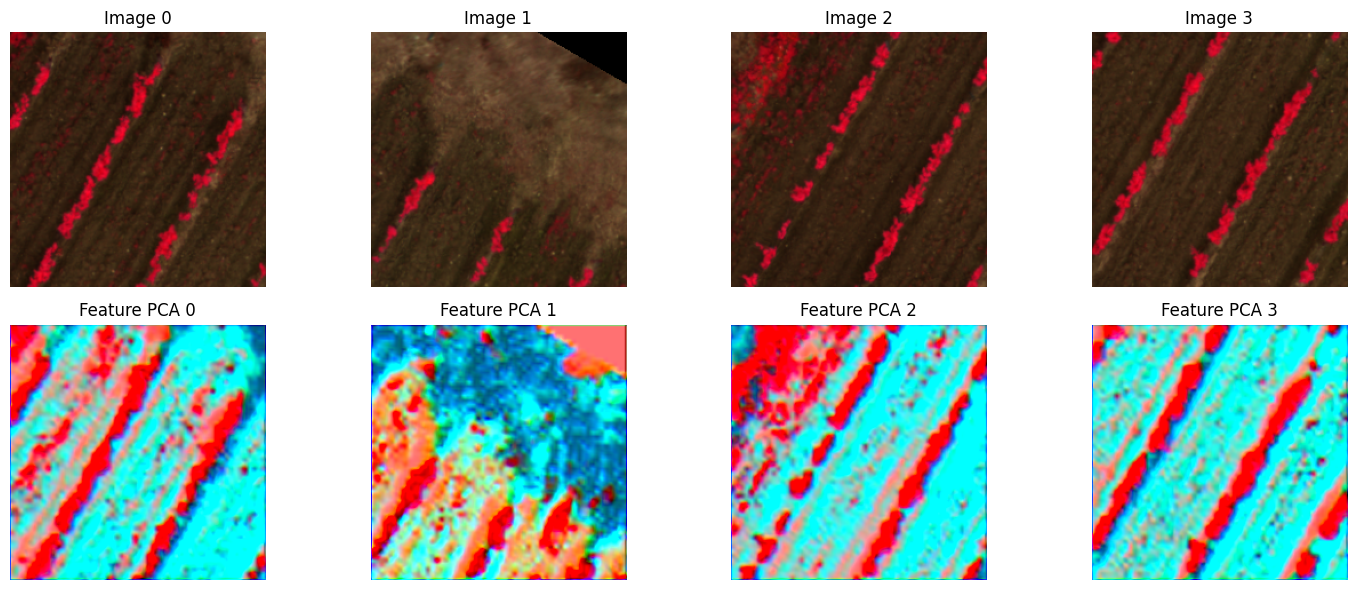

In [16]:
a = visualize_features_from_model(swinmodel, test_loader_v, device = "cuda")

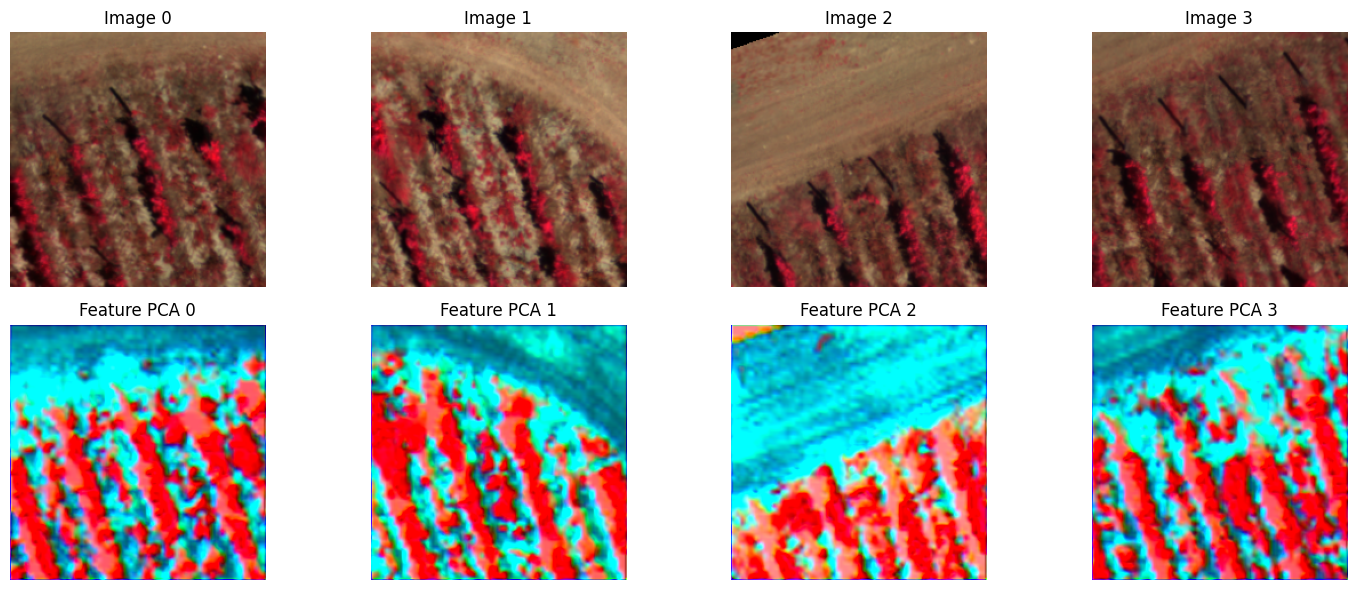

In [17]:
a = visualize_features_from_model(swinmodel, test_loader_q, device = "cuda")

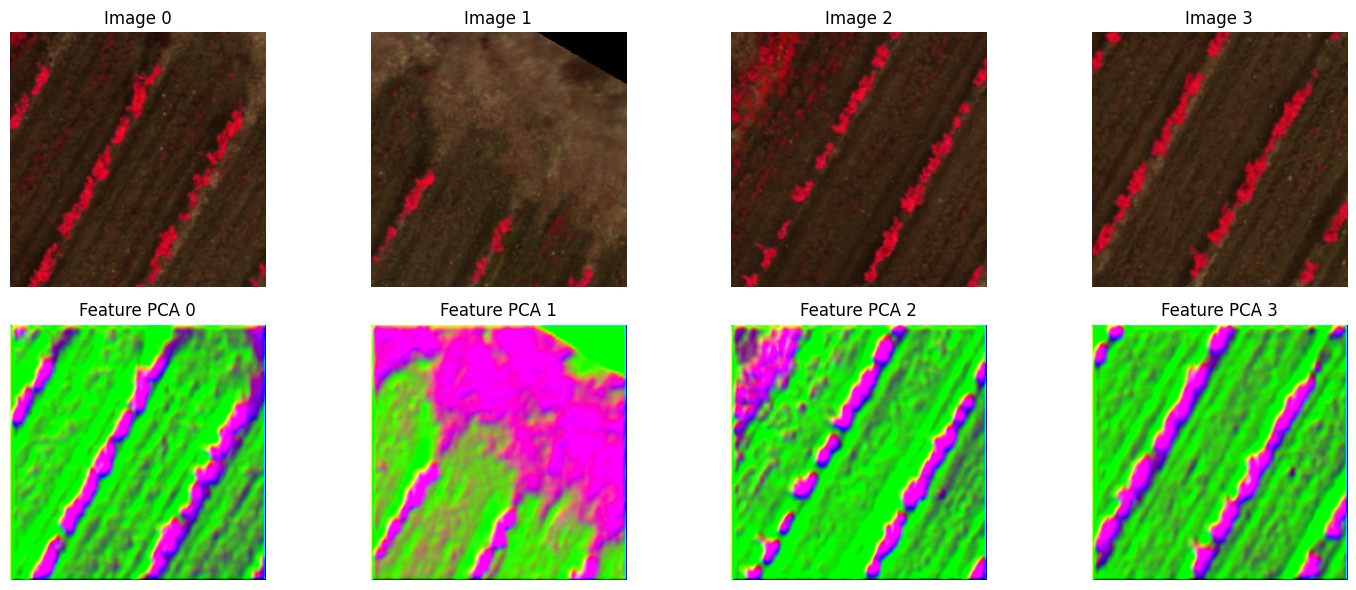

In [18]:
b = visualize_features_from_model(r18model, test_loader_v, device = "cuda")

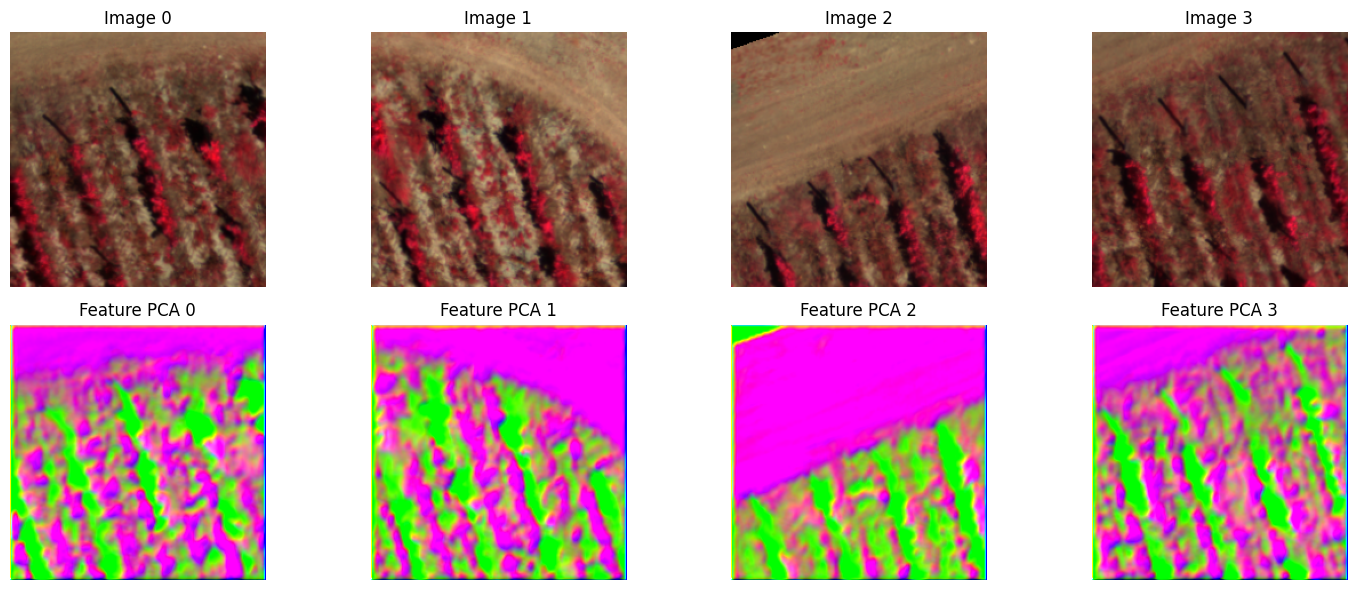

In [19]:
c = visualize_features_from_model(r18model, test_loader_q, device = "cuda")